In [1]:
import pandas as pd
import numpy as np
import re
import glob
import matplotlib.pyplot as plt
import os

In [2]:
def numericalSort(value):
    """This function will sort the numerical values of the file names orderly"""
    numbers = re.compile(r'(\d+)')
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])  # convert string to integer
    return parts     

In [3]:
def find_csv_to_dataframe(main_path):
    csv_dataframe = []
    for filename in sorted(glob.glob(main_path + '/*.csv'), key=numericalSort):
        data = pd.read_csv(filename)
        data.columns = map(lambda x: x.lower().strip().replace(' ', '_'), data.columns)
        csv_dataframe.append(data)
    
    return csv_dataframe

In [4]:
def find_max_id(dataframes):
    id_list = [df['track_id'].iloc[0] for df in dataframes]
    return max(id_list)

In [5]:
# Assuming id_data is a DataFrame
def calculate_euclidean_distance(id_data):
    return np.sqrt((id_data['new_gravity_x'].diff().fillna(0))**2 + 
                   (id_data['new_gravity_y'].diff().fillna(0))**2)

def calculate_total_euclidean_distance(id_data):
    return calculate_euclidean_distance(id_data).sum()

def calculate_cum_euclidean_distance(id_data):
    return np.cumsum(calculate_euclidean_distance(id_data))

In [6]:
def calculate_velocity_magnitude(id_data, frame_duration_seconds=0.5):
#     Calculate velocity
    velocity_x = id_data['new_gravity_x'].diff() / frame_duration_seconds
    velocity_y = id_data['new_gravity_y'].diff() / frame_duration_seconds

    # Calculate magnitude of velocity vector
    magnitude_velocity = np.sqrt(velocity_x ** 2 + velocity_y ** 2)
    

    # Sum up velocity components and magnitude
    total_velocity_x = velocity_x.sum()
    total_velocity_y = velocity_y.sum()
    total_magnitude_velocity = magnitude_velocity.sum()

    return total_velocity_x, total_velocity_y, total_magnitude_velocity

def calculate_cum_velocity_magnitude(id_data, frame_duration_seconds=0.5):
    return np.cumsum(calculate_velocity_magnitude(id_data))

In [7]:
def calculate_acceleration_magnitude(id_data, frame_duration_seconds=0.5):
    # Calculate velocity
    velocity_x = id_data['new_gravity_x'].diff() / frame_duration_seconds
    velocity_y = id_data['new_gravity_y'].diff() / frame_duration_seconds
    
    # Calculate acceleration components
    acceleration_x = velocity_x.diff() / frame_duration_seconds
    acceleration_y = velocity_y.diff() / frame_duration_seconds
    
    # Calculate magnitude of acceleration vector
    magnitude_acceleration = np.sqrt(acceleration_x ** 2 + acceleration_y ** 2)
    
    # Sum up acceleration components and magnitude
    total_acceleration_x = acceleration_x.sum()
    total_acceleration_y = acceleration_y.sum()
    total_magnitude_acceleration = magnitude_acceleration.sum()

#     return total_acceleration_x, total_acceleration_y, total_magnitude_acceleration
    return total_magnitude_acceleration


def calculate_cum_acceleration_magnitude(id_data, frame_duration_seconds=0.5):
    return np.cumsum(calculate_acceleration_magnitude(id_data))

In [8]:
def calculate_acceleration(id_data,frame_duration_seconds=0.5):
    # calculate distance
    distance = np.sqrt((id_data['new_gravity_x'].diff().fillna(0))**2 + 
                       (id_data['new_gravity_y'].diff().fillna(0))**2)

    # calculate speed 
    speed = distance / frame_duration_seconds

    # calculate acceleration as the rate of change of speed
    acceleration = speed.diff() / frame_duration_seconds

    # sum up acceleration 
    total_acceleration = acceleration.sum()
    
    return total_acceleration

In [9]:
def calculate_acceleration_abs(id_data,frame_duration_seconds=0.5):
    # calculate distance
    distance = np.sqrt((id_data['new_gravity_x'].diff().fillna(0))**2 + 
                       (id_data['new_gravity_y'].diff().fillna(0))**2)

    # calculate speed 
    speed = distance / frame_duration_seconds

    # calculate acceleration as the rate of change of speed
    acceleration = speed.diff() / frame_duration_seconds

    # Take the absolute value of acceleration
    absolute_acceleration = np.abs(acceleration)

    # Sum up the absolute acceleration
    total_absolute_acceleration = absolute_acceleration.sum()

    return total_absolute_acceleration

def calculate_cum_acceleration_abs(id_data, frame_duration_seconds=0.5):
    return np.cumsum(calculate_acceleration_abs(id_data))

In [10]:
def triangle_area(vertices):
    x1, y1 = vertices[0]
    x2, y2 = vertices[1]
    x3, y3 = vertices[2]
    return 0.5 * abs((x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2)))

def moving_average_triangle_area(x_values, y_values, window_size):
    moving_averages = []
    for i in range(len(x_values) - window_size + 1):
        triangle_areas = []
        for j in range(i, i + window_size - 2):
            triangle_vertices = [(x_values[j], y_values[j]), (x_values[j+1], y_values[j+1]), (x_values[j+2], y_values[j+2])]
            triangle_areas.append(triangle_area(triangle_vertices))
        average_area = sum(triangle_areas) / len(triangle_areas)
        moving_averages.append(average_area)
    return moving_averages

def cumulative_moving_average_triangle_area(x_values, y_values, window_size):
    triangle_areas = moving_average_triangle_area(x_values, y_values, window_size)
    return np.cumsum(triangle_areas)

### Find All Cows [Total Euclidean Distance, Total Magnitude of Acceleration , (Mean+Std) ]

Mean + Std Distance Cow 1 : 57762.4
Mean + Std Acceleration Cow 1 : 392399.7
Mean + Std Distance Cow 2 : 77868.7
Mean + Std Acceleration Cow 2 : 552957.4
Mean + Std Distance Cow 3 : 84560.2
Mean + Std Acceleration Cow 3 : 611346.8
Mean + Std Distance Cow 4 : 49405.1
Mean + Std Acceleration Cow 4 : 343759.1
Mean + Std Distance Cow 5 : 37879.6
Mean + Std Acceleration Cow 5 : 264510.2
Mean + Std Distance Cow 6 : 72582.5
Mean + Std Acceleration Cow 6 : 505876.3
Mean + Std Distance Cow 7 : 34912.1
Mean + Std Acceleration Cow 7 : 232132.0
Mean + Std Distance Cow 8 : 45531.8
Mean + Std Acceleration Cow 8 : 322430.8
Mean + Std Distance Cow 9 : 36589.4
Mean + Std Acceleration Cow 9 : 241728.3
Mean + Std Distance Cow 10 : 48403.3
Mean + Std Acceleration Cow 10 : 325102.5
Mean + Std Distance Cow 11 : 61728.4
Mean + Std Acceleration Cow 11 : 439127.5
Mean + Std Distance Cow 12 : 79311.0
Mean + Std Acceleration Cow 12 : 563904.0
Mean + Std Distance Cow 13 : 58061.3
Mean + Std Acceleration Cow 13 : 

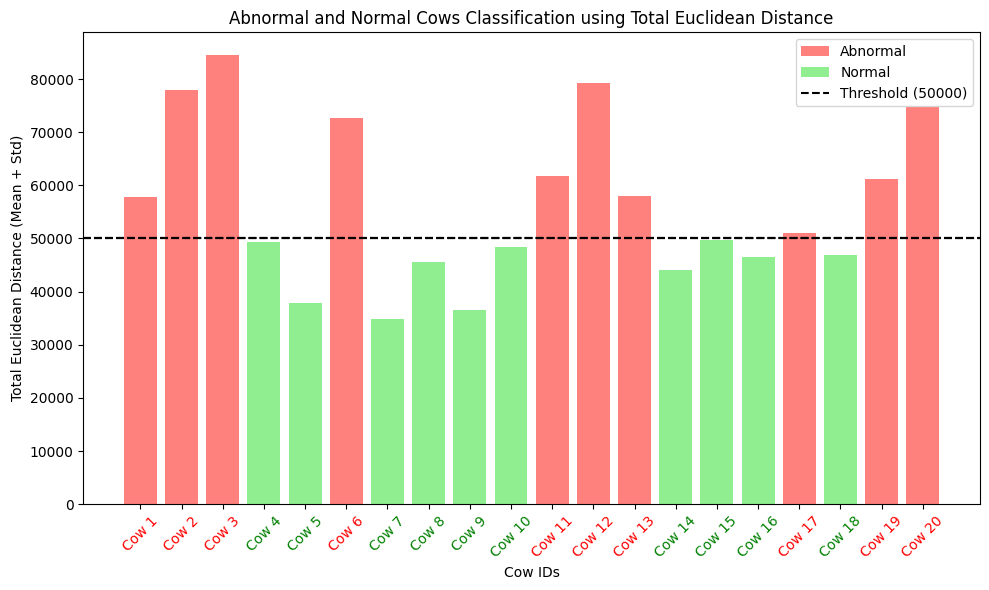

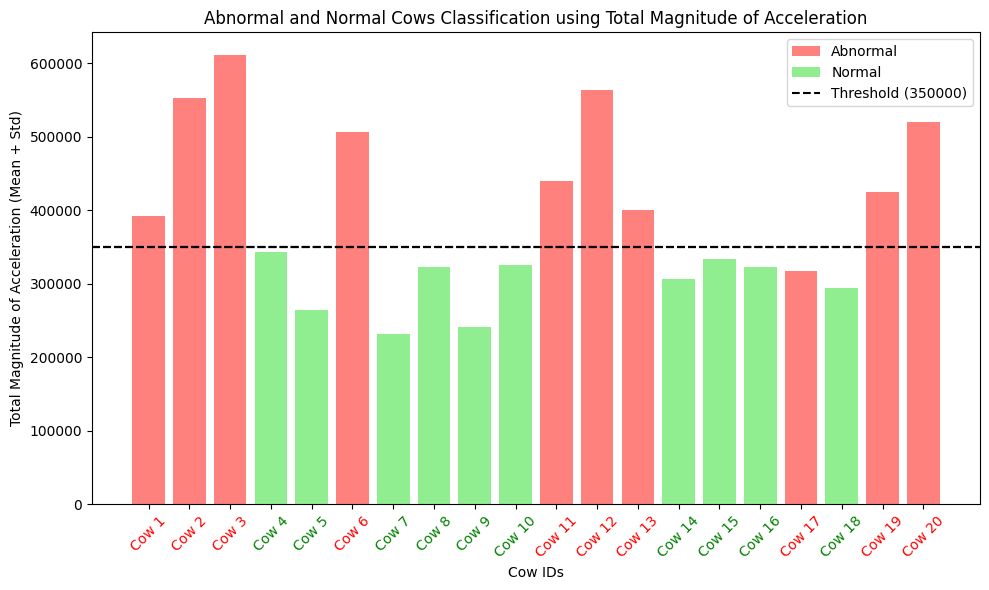

In [11]:
paths = [r'.\data\Cow 1',
         r'.\data\Cow 2',
         r'.\data\Cow 3',
         r'.\data\Cow 4',
         r'.\data\Cow 5',
         r'.\data\Cow 6',
         r'.\data\Cow 7',
         r'.\data\Cow 8',
         r'.\data\Cow 9',
         r'.\data\Cow 10',
         r'.\data\Cow 11',
         r'.\data\Cow 12',
         r'.\data\Cow 13',
         r'.\data\Cow 14',
         r'.\data\Cow 15',
         r'.\data\Cow 16',
         r'.\data\Cow 17',
         r'.\data\Cow 18',
         r'.\data\Cow 19',
         r'.\data\Cow 20']
         
mean_plus_std_distances = []
mean_plus_std_accelerations = []
results = []
save_path = r'.\results'
distance_th = 50000
acceleration_th = 350000
cow_labels = [f'Cow {i+1}' for i in range(20)]

for main_path in paths:
    folder_ = main_path.split('\\')[-1]
    filelist = []

    csv_dataframe = find_csv_to_dataframe(main_path)
    ID = find_max_id(csv_dataframe)

    # replace ID 
    for i in range(len(csv_dataframe)):
        csv_dataframe[i]['modify_id'] = csv_dataframe[i]['track_id'].replace({1: ID, 2: ID})

    sum_euclidean = [calculate_total_euclidean_distance(id_data) for id_data in csv_dataframe]
    sum_acceleration_magnitude = [calculate_acceleration_magnitude(id_data) for id_data in csv_dataframe]
    
    mean_distance = np.mean(sum_euclidean)
    std_distance = np.std(sum_euclidean)
    mean_plus_one_std_distance = mean_distance + std_distance

    mean_acceleration = np.mean(sum_acceleration_magnitude)
    std_acceleration = np.std(sum_acceleration_magnitude)
    mean_plus_one_std_acceleration = mean_acceleration + std_acceleration

    mean_plus_std_distances.append(mean_plus_one_std_distance)
    mean_plus_std_accelerations.append(mean_plus_one_std_acceleration)

    # Print results
    print(f"Mean + Std Distance {folder_} : {mean_plus_one_std_distance:.1f}")
    print(f"Mean + Std Acceleration {folder_} : {mean_plus_one_std_acceleration:.1f}")

    # Append results to the list
    results.append({
        'Cow ID': folder_,
        'Total Euclidean Distance (Mean + Std)': mean_plus_one_std_distance,
        'Total Magnitude of Acceleration (Mean + Std)': mean_plus_one_std_acceleration
    })

# Define Cow IDs that are considered Abnormal
abnormal_cow_ids = [1, 2, 3, 6, 11, 12, 13, 17, 19, 20]

# Determine colors and labels for distances based on thresholds
colors_distances = ['#FF817E' if (i + 1) in abnormal_cow_ids else 'lightgreen' for i, value in enumerate(mean_plus_std_distances)]
distance_label_colors = ['red' if (i + 1) in abnormal_cow_ids else 'green' for i, value in enumerate(mean_plus_std_distances)]

# Determine colors and labels for accelerations based on thresholds
colors_accelerations = ['#FF817E' if (i + 1) in abnormal_cow_ids else 'lightgreen' for i, value in enumerate(mean_plus_std_accelerations)]
acceleration_label_colors = ['red' if (i + 1) in abnormal_cow_ids else 'green' for i, value in enumerate(mean_plus_std_accelerations)]


# Convert results to a DataFrame
df = pd.DataFrame(results)

# Save the DataFrame to an Excel file
excel_file = 'output.xlsx'
df.to_excel(excel_file, index=False)

print(f"Data saved to {excel_file}")


# Plotting Mean + Std Distance
plt.figure(figsize=(10, 6))
bars = plt.bar(cow_labels, mean_plus_std_distances, color=colors_distances)
plt.axhline(y=distance_th, color='black', linestyle='--')
plt.xlabel('Cow IDs')
plt.ylabel('Total Euclidean Distance (Mean + Std)')
plt.title('Abnormal and Normal Cows Classification using Total Euclidean Distance')

# Define legend handles and labels
legend_handles = [bars[0], bars[4], plt.axhline(y=distance_th, color='black', linestyle='--')]
legend_labels = {bars[0]: 'Abnormal', bars[4]: 'Normal', plt.axhline(y=distance_th, color='black', linestyle='--'): f'Threshold ({distance_th})'}
plt.legend(legend_handles, legend_labels.values())

# Change label colors based on condition
for label, color in zip(plt.gca().get_xticklabels(), distance_label_colors):
    label.set_color(color)

plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to the folder
plot_filename = os.path.join(save_path, f'cattle_classification_distance.png')
plt.savefig(plot_filename)  
plt.show()

# Plotting Mean + Std Acceleration
plt.figure(figsize=(10, 6))
bars = plt.bar(cow_labels, mean_plus_std_accelerations, color=colors_accelerations)
plt.axhline(y=acceleration_th, color='black', linestyle='--')

# Define legend handles and labels
legend_handles = [bars[0], bars[4], plt.axhline(y=acceleration_th, color='black', linestyle='--')]
legend_labels = {bars[0]: 'Abnormal', bars[4]: 'Normal', plt.axhline(y=acceleration_th, color='black', linestyle='--'): f'Threshold ({acceleration_th})'}

plt.legend(legend_handles, legend_labels.values())

# Change label colors based on condition
for label, color in zip(plt.gca().get_xticklabels(), acceleration_label_colors):
    label.set_color(color)

plt.xlabel('Cow IDs')
plt.ylabel('Total Magnitude of Acceleration (Mean + Std)')
plt.title('Abnormal and Normal Cows Classification using Total Magnitude of Acceleration')
plt.xticks(rotation=45)
plt.tight_layout()


# Save the plot to the folder
plot_filename_ = os.path.join(save_path, f'cattle_classification_acceleration.png')
plt.savefig(plot_filename_)  
plt.show()


### Find All Cows [Total Moving Average of Triangle Area , (Mean+Std) ]

Mean + Std Moving Average of Triangle Area Cow 1 : 285464.4
Mean + Std Moving Average of Triangle Area Cow 2 : 330769.8
Mean + Std Moving Average of Triangle Area Cow 3 : 301774.3
Mean + Std Moving Average of Triangle Area Cow 4 : 147752.7
Mean + Std Moving Average of Triangle Area Cow 5 : 120125.5
Mean + Std Moving Average of Triangle Area Cow 6 : 292388.8
Mean + Std Moving Average of Triangle Area Cow 7 : 134943.5
Mean + Std Moving Average of Triangle Area Cow 8 : 168159.5
Mean + Std Moving Average of Triangle Area Cow 9 : 133134.1
Mean + Std Moving Average of Triangle Area Cow 10 : 329791.4
Mean + Std Moving Average of Triangle Area Cow 11 : 219607.8
Mean + Std Moving Average of Triangle Area Cow 12 : 289518.4
Mean + Std Moving Average of Triangle Area Cow 13 : 256657.9
Mean + Std Moving Average of Triangle Area Cow 14 : 183704.4
Mean + Std Moving Average of Triangle Area Cow 15 : 170320.3
Mean + Std Moving Average of Triangle Area Cow 16 : 108649.6
Mean + Std Moving Average of Tria

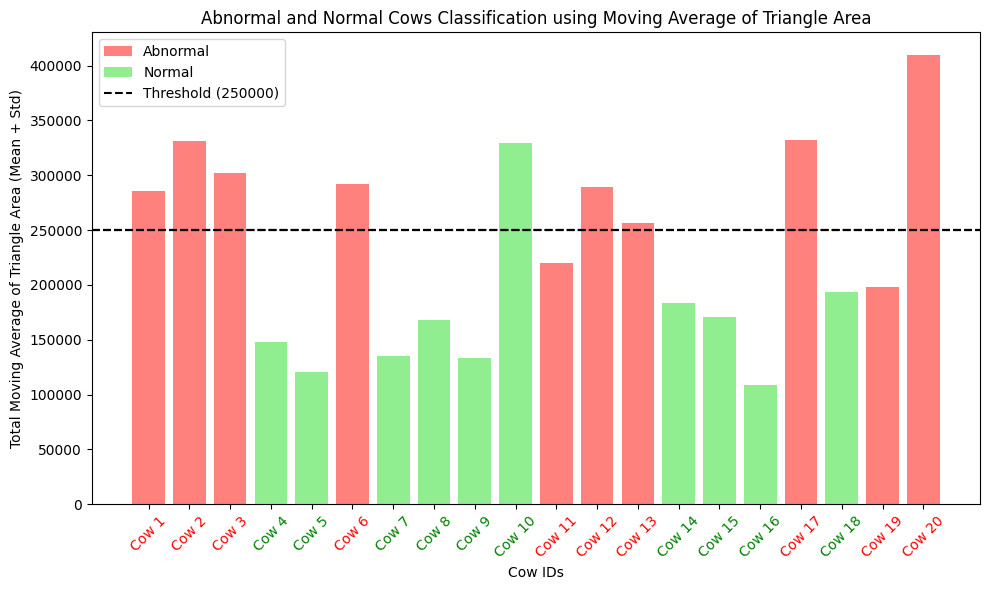

In [12]:
paths = [r'.\data\Cow 1',
         r'.\data\Cow 2',
         r'.\data\Cow 3',
         r'.\data\Cow 4',
         r'.\data\Cow 5',
         r'.\data\Cow 6',
         r'.\data\Cow 7',
         r'.\data\Cow 8',
         r'.\data\Cow 9',
         r'.\data\Cow 10',
         r'.\data\Cow 11',
         r'.\data\Cow 12',
         r'.\data\Cow 13',
         r'.\data\Cow 14',
         r'.\data\Cow 15',
         r'.\data\Cow 16',
         r'.\data\Cow 17',
         r'.\data\Cow 18',
         r'.\data\Cow 19',
         r'.\data\Cow 20']

save_path = r'.\results'
mv_th = 250000
results = []
cow_labels = [f'Cow {i+1}' for i in range(20)]

# List to store mean + 1 std for each cow
mean_plus_one_std_mv_list = []

for main_path in paths:
    
    folder_ = main_path.split('\\')[-1]
    filelist = []
    window_size = 3
    sum_mv = []

    csv_dataframe = find_csv_to_dataframe(main_path)
    ID = find_max_id(csv_dataframe)

    # Replace ID 
    for i in range(len(csv_dataframe)):
        csv_dataframe[i]['modify_id'] = csv_dataframe[i]['track_id'].replace({1: ID, 2: ID})

    # Iterate through each CSV data frame in reverse order
    for idx, id_data in enumerate(csv_dataframe):
        x_values = id_data['new_gravity_x']
        y_values = id_data['new_gravity_y']
        
        moving_avg_euclidean_distance = moving_average_triangle_area(x_values, y_values, window_size)
        sum_mv.append(sum(moving_avg_euclidean_distance))
        
    # Calculate mean and standard deviation 
    mean_mv = np.mean(sum_mv)
    std_mv = np.std(sum_mv)

    # Calculate mean + 1 std
    mean_plus_one_std_mv = mean_mv + std_mv
    mean_plus_one_std_mv_list.append(mean_plus_one_std_mv)

    # Print results
    print(f"Mean + Std Moving Average of Triangle Area {folder_} : {mean_plus_one_std_mv:.1f}")
    
    # Append results to the list
    results.append({
            'Cow ID': folder_,
            'Total Moving Average of Triangle Area (Mean + Std)': mean_plus_one_std_mv,
        })

# Define Cow IDs that are considered Abnormal
abnormal_cow_ids = [1, 2, 3, 6, 11, 12, 13, 17, 19, 20]

# Determine colors and labels for distances based on thresholds
colors_mv = ['#FF817E' if (i + 1) in abnormal_cow_ids else 'lightgreen' for i in range(len(mean_plus_one_std_mv_list))]
mv_label_colors = ['red' if (i + 1) in abnormal_cow_ids else 'green' for i in range(len(mean_plus_one_std_mv_list))]

# Convert results to a DataFrame
df = pd.DataFrame(results)

# Save the DataFrame to an Excel file
excel_file = 'output_.xlsx'
df.to_excel(excel_file, index=False)

print(f"Data saved to {excel_file}")

# Plotting Mean + Std Distance
plt.figure(figsize=(10, 6))
bars = plt.bar(cow_labels, mean_plus_one_std_mv_list, color=colors_mv)
plt.axhline(y=mv_th, color='black', linestyle='--')
plt.xlabel('Cow IDs')
plt.ylabel('Total Moving Average of Triangle Area (Mean + Std)')
plt.title('Abnormal and Normal Cows Classification using Moving Average of Triangle Area')

# Define legend handles and labels
legend_handles = [bars[0], bars[4], plt.axhline(y=mv_th, color='black', linestyle='--')]
legend_labels = {bars[0]: 'Abnormal', bars[4]: 'Normal', plt.axhline(y=mv_th, color='black', linestyle='--'): f'Threshold ({mv_th})'}
plt.legend(legend_handles, legend_labels.values())

# Change label colors based on condition
for label, color in zip(plt.gca().get_xticklabels(), mv_label_colors):
    label.set_color(color)

plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to the folder
plot_filename = os.path.join(save_path, f'cattle_classification_moving_average.png')
plt.savefig(plot_filename)  
plt.show()

### All Cows (Cumulative Euclidean Distance, Mean + Std)_CalvingTime

Data has been successfully written to abnormal_output.xlsx
Data has been successfully written to normal_output.xlsx
Abnormal Mean + Std Value :  426806.4452611791
Normal Mean + Std Value :  275774.288199186


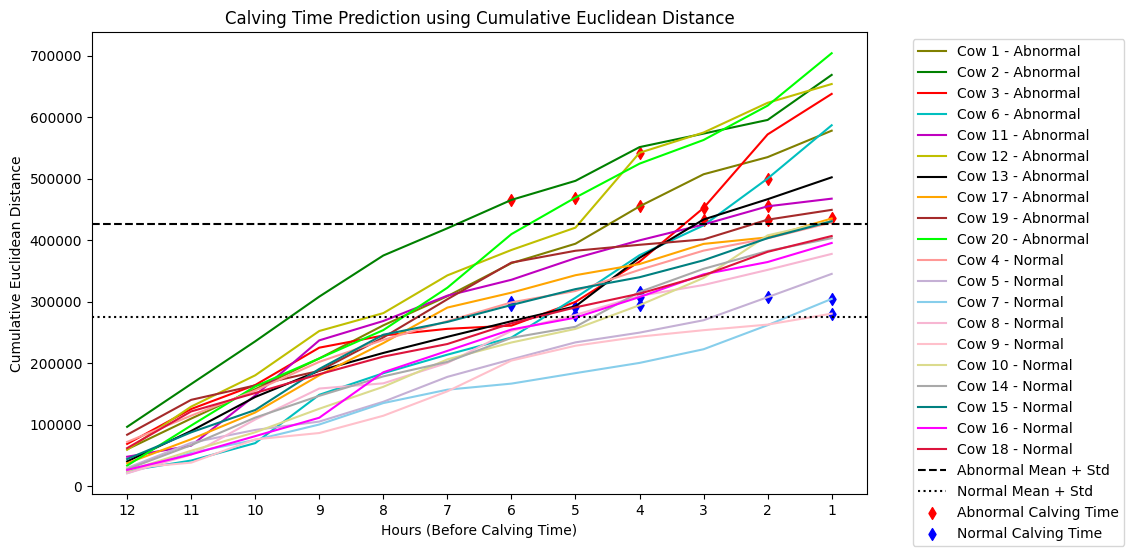

In [14]:
# List of paths for abnormal cows
abnormal_paths = [r'.\data\Cow 1',
                  r'.\data\Cow 2',
                  r'.\data\Cow 3',
                  r'.\data\Cow 6',
                  r'.\data\Cow 11',
                  r'.\data\Cow 12',
                  r'.\data\Cow 13',
                  r'.\data\Cow 17',
                  r'.\data\Cow 19',
                  r'.\data\Cow 20']

# List of paths for normal cows
normal_paths = [r'.\data\Cow 4',
                r'.\data\Cow 5',
                r'.\data\Cow 7',
                r'.\data\Cow 8',
                r'.\data\Cow 9',
                r'.\data\Cow 10',
                r'.\data\Cow 14',
                r'.\data\Cow 15',
                r'.\data\Cow 16',
                r'.\data\Cow 18']

# Lists to store cumulative moving average for abnormal and normal cows
abnormal_distance = []
normal_distance = []
all_abnormal_data = []
all_normal_data = []

# Define a list of colors for plotting each cow
colors = ['olive', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'brown', 'lime', '#ff9896', '#c5b0d5',
          'skyblue', '#f7b6d2', 'pink', '#dbdb8d', 'darkgray','teal', 'magenta','crimson']


# Loop for abnormal cows
for idx, main_path in enumerate(abnormal_paths):
    cumulative_distance_last_values = []
    csv_dataframe = find_csv_to_dataframe(main_path)
    csv_dataframe = csv_dataframe[::-1]

    ID = find_max_id(csv_dataframe)
    for idx, id_data in enumerate(csv_dataframe):
        euclidean_distance = calculate_cum_euclidean_distance(id_data)
        if idx == 0:
            cumulative_distance_last_values.append(euclidean_distance.iloc[-1])
            #print(len(cumulative_distance_last_values))
        else:
            cumulative_distance_last_values.append(cumulative_distance_last_values[-1] + euclidean_distance.iloc[-1])
            #print(len(cumulative_distance_last_values))
    abnormal_distance.append(cumulative_distance_last_values) 
    abnormal = main_path.split('\\')[-1]
    # print(f"Abnormal {abnormal} : {cumulative_distance_last_values}")

    # Creating formatted strings
    abnormal_output = []
    for idx in range(12, 0, -1):
        abnormal_string = f" {abnormal}, {idx}, {cumulative_distance_last_values[12 - idx]}"
        abnormal_output.append(abnormal_string)

    # Append to all_abnormal_data
    all_abnormal_data.extend(abnormal_output)

# Create a DataFrame from all abnormal data
df = pd.DataFrame([row.split(', ') for row in all_abnormal_data], columns=["Cattle IDs", "Before Calving Hours", "Cumulative Euclidean Distance"])

# Convert columns to numeric types
df["Before Calving Hours"] = pd.to_numeric(df["Before Calving Hours"].str.strip())
df["Cumulative Euclidean Distance"] = pd.to_numeric(df["Cumulative Euclidean Distance"].str.strip())


# Write DataFrame to Excel
excel_file = "abnormal_output.xlsx"
df.to_excel(excel_file, index=False)

print(f"Data has been successfully written to {excel_file}")

# Loop for normal cows
for main_path in normal_paths:
    cumulative_distance_last_values = []
    csv_dataframe = find_csv_to_dataframe(main_path)
    csv_dataframe = csv_dataframe[::-1]

    ID = find_max_id(csv_dataframe)

    for idx, id_data in enumerate(csv_dataframe):
        euclidean_distance = calculate_cum_euclidean_distance(id_data)
        if idx == 0:
            cumulative_distance_last_values.append(euclidean_distance.iloc[-1])
            
        else:
            cumulative_distance_last_values.append(cumulative_distance_last_values[-1] + euclidean_distance.iloc[-1])

    normal_distance.append(cumulative_distance_last_values) 
    normal = main_path.split('\\')[-1]
    # print(f"Normal Distance {normal} : {cumulative_distance_last_values}")

    # Creating formatted strings
    normal_output = []
    for idx in range(12, 0, -1):
        normal_string = f" {normal}, {idx}, {cumulative_distance_last_values[12 - idx]}"
        normal_output.append(normal_string)

    # Append to all_abnormal_data
    all_normal_data.extend(normal_output)

# Create a DataFrame from all abnormal data
df = pd.DataFrame([row.split(', ') for row in all_normal_data], columns=["Cattle IDs", "Before Calving Hours", "Cumulative Euclidean Distance"])

# Convert columns to numeric types
df["Before Calving Hours"] = pd.to_numeric(df["Before Calving Hours"].str.strip())
df["Cumulative Euclidean Distance"] = pd.to_numeric(df["Cumulative Euclidean Distance"].str.strip())

# Write DataFrame to Excel
excel_file = "normal_output.xlsx"
df.to_excel(excel_file, index=False)

print(f"Data has been successfully written to {excel_file}")

# Calculate mean and standard deviation for abnormal cows
abnormal_distance_concat = np.concatenate(abnormal_distance)
mean_abnormal_distance = np.mean(abnormal_distance_concat)
std_abnormal_distance = np.std(abnormal_distance_concat)
mean_plus_std_abnormal_distance = mean_abnormal_distance + std_abnormal_distance
print("Abnormal Mean + Std Value : ",mean_plus_std_abnormal_distance)

# Calculate mean and standard deviation for normal cows
normal_distance_concat = np.concatenate(normal_distance)
mean_normal_distance = np.mean(normal_distance_concat)
std_normal_distance = np.std(normal_distance_concat)
mean_plus_std_normal_distance = mean_normal_distance + std_normal_distance
print("Normal Mean + Std Value : ",mean_plus_std_normal_distance)

    
# Plotting abnormal and normal cows together
plt.figure(figsize=(10, 6))
hours = list(range(-12, 0))

# Initialize variables to store x and y coordinates for red and blue diamonds
x_rd = []
y_rd = []
x_bd = []
y_bd = []

# Plot abnormal cows
for i, sublist in enumerate(abnormal_distance):
    folder = abnormal_paths[i].split('\\')[-1]
    plt.plot(hours, sublist, label=f'{folder} - Abnormal', color=colors[i % len(colors)])


    # Find the first index where abnormal condition is met
    idx_abnormal = next((idx for idx, value in enumerate(sublist) if value >= mean_plus_std_abnormal_distance), None)

    # Plot red diamond if abnormal condition is met
    if idx_abnormal is not None:
        x_rd.append(hours[idx_abnormal])
        y_rd.append(sublist[idx_abnormal])

# Plot normal cows
for i, sublist in enumerate(normal_distance):
    folder = normal_paths[i].split('\\')[-1]
    plt.plot(hours, sublist, label=f'{folder} - Normal', color=colors[(i + len(abnormal_paths)) % len(colors)])

    # Find the first index where normal condition is met
    idx_normal = next((idx for idx, value in enumerate(sublist) if value >= mean_plus_std_normal_distance), None)

    # Plot blue diamond if normal condition is met
    if idx_normal is not None:
        x_bd.append(hours[idx_normal])
        y_bd.append(sublist[idx_normal])

# Plot mean plus std lines for abnormal and normal cows
plt.axhline(mean_plus_std_abnormal_distance, color='black', linestyle='--', label='Abnormal Mean + Std')
plt.axhline(mean_plus_std_normal_distance, color='black', linestyle=':', label='Normal Mean + Std')

# Plot red diamond for abnormal calving time prediction
plt.scatter(x_rd, y_rd, color='red', label='Abnormal Calving Time', marker='d')
# Plot blue diamond for normal calving time prediction
plt.scatter(x_bd, y_bd, color='blue', label='Normal Calving Time', marker='d')

plt.xlabel('Hours (Before Calving Time)')
plt.ylabel('Cumulative Euclidean Distance')
plt.title('Calving Time Prediction using Cumulative Euclidean Distance')
# plt.xticks(range(-12, 0))
plt.xticks(range(-12, 0), [str(abs(i)) for i in range(12, 0, -1)])

# Place legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)

save_path = r'.\results'

# Save the plot to the folder
plot_filename = os.path.join(save_path, f'cattle_prediction_distance.png')
plt.savefig(plot_filename, bbox_inches='tight')  # bbox_inches='tight' ensures that the legend is included

# Show the plot
plt.show()

### All Cows (Cumulative Magnitude of Acceleration, Mean + Std)_CalvingTime

Data has been successfully written to abnormal_output1.xlsx
Data has been successfully written to normal_output1.xlsx
Abnormal Mean + Std Value :  1232994.359330599
Normal Mean + Std Value :  1084063.645652815


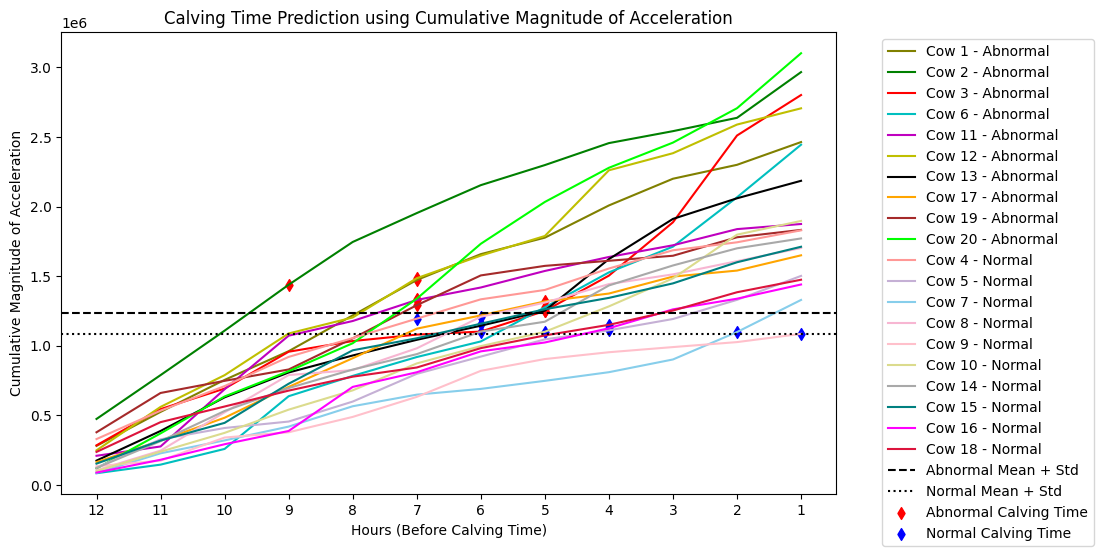

In [15]:
# List of paths for abnormal cows
abnormal_paths = [r'.\data\Cow 1',
                  r'.\data\Cow 2',
                  r'.\data\Cow 3',
                  r'.\data\Cow 6',
                  r'.\data\Cow 11',
                  r'.\data\Cow 12',
                  r'.\data\Cow 13',
                  r'.\data\Cow 17',
                  r'.\data\Cow 19',
                  r'.\data\Cow 20']

# List of paths for normal cows
normal_paths = [r'.\data\Cow 4',
                r'.\data\Cow 5',
                r'.\data\Cow 7',
                r'.\data\Cow 8',
                r'.\data\Cow 9',
                r'.\data\Cow 10',
                r'.\data\Cow 14',
                r'.\data\Cow 15',
                r'.\data\Cow 16',
                r'.\data\Cow 18']

# Lists to store cumulative moving average for abnormal and normal cows
abnormal_acc = []
normal_acc = []
all_abnormal_data = []
all_normal_data = []

# Define a list of colors for plotting each cow
colors = ['olive', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'brown', 'lime', '#ff9896', '#c5b0d5',
          'skyblue', '#f7b6d2', 'pink', '#dbdb8d', 'darkgray','teal', 'magenta','crimson']


# Loop for abnormal cows
for idx, main_path in enumerate(abnormal_paths):
    cumulative_acc_last_values = []
    csv_dataframe = find_csv_to_dataframe(main_path)
    csv_dataframe = csv_dataframe[::-1]

    ID = find_max_id(csv_dataframe)

    for idx, id_data in enumerate(csv_dataframe):
        abs_acceleration = calculate_cum_acceleration_abs(id_data)
        if idx == 0:
            cumulative_acc_last_values.append(abs_acceleration[-1])
        else:
            cumulative_acc_last_values.append(cumulative_acc_last_values[-1] + abs_acceleration[-1])

    abnormal_acc.append(cumulative_acc_last_values)
    abnormal = main_path.split('\\')[-1]
    # print(f"Abnormal Magnitude of Acceleration {abnormal} : {cumulative_acc_last_values}")

    # Creating formatted strings
    abnormal_output = []
    for idx in range(12, 0, -1):
        abnormal_string = f" {abnormal}, {idx}, {cumulative_acc_last_values[12 - idx]}"
        abnormal_output.append(abnormal_string)

    # Append to all_abnormal_data
    all_abnormal_data.extend(abnormal_output)

# Create a DataFrame from all abnormal data
df = pd.DataFrame([row.split(', ') for row in all_abnormal_data], columns=["Cattle IDs", "Before Calving Hours", "Cumulative Magnitude of Acceleration"])

# Convert columns to numeric types
df["Before Calving Hours"] = pd.to_numeric(df["Before Calving Hours"].str.strip())
df["Cumulative Magnitude of Acceleration"] = pd.to_numeric(df["Cumulative Magnitude of Acceleration"].str.strip())


# Write DataFrame to Excel
excel_file = "abnormal_output1.xlsx"
df.to_excel(excel_file, index=False)

print(f"Data has been successfully written to {excel_file}")



# Loop for normal cows
for main_path in normal_paths:
    cumulative_acc_last_values = []
    csv_dataframe = find_csv_to_dataframe(main_path)
    csv_dataframe = csv_dataframe[::-1]

    ID = find_max_id(csv_dataframe)

    for idx, id_data in enumerate(csv_dataframe):
        abs_acceleration = calculate_cum_acceleration_abs(id_data)
        if idx == 0:
            cumulative_acc_last_values.append(abs_acceleration[-1])
            
        else:
            cumulative_acc_last_values.append(cumulative_acc_last_values[-1] + abs_acceleration[-1])

    normal_acc.append(cumulative_acc_last_values)
    normal = main_path.split('\\')[-1]
    # print(f"Normal Magnitude of Acceleration {normal} : {cumulative_acc_last_values}")

    # Creating formatted strings
    normal_output = []
    for idx in range(12, 0, -1):
        normal_string = f" {normal}, {idx}, {cumulative_acc_last_values[12 - idx]}"
        normal_output.append(normal_string)

    # Append to all_abnormal_data
    all_normal_data.extend(normal_output)

# Create a DataFrame from all abnormal data
df = pd.DataFrame([row.split(', ') for row in all_normal_data], columns=["Cattle IDs", "Before Calving Hours", "Cumulative Magnitude of Acceleration"])

# Convert columns to numeric types
df["Before Calving Hours"] = pd.to_numeric(df["Before Calving Hours"].str.strip())
df["Cumulative Magnitude of Acceleration"] = pd.to_numeric(df["Cumulative Magnitude of Acceleration"].str.strip())

# Write DataFrame to Excel
excel_file = "normal_output1.xlsx"
df.to_excel(excel_file, index=False)

print(f"Data has been successfully written to {excel_file}")


# Calculate mean and standard deviation for abnormal cows
abnormal_acc_concat = np.concatenate(abnormal_acc)
mean_abnormal_acc = np.mean(abnormal_acc_concat)
std_abnormal_acc = np.std(abnormal_acc_concat)
mean_plus_std_abnormal_acc = mean_abnormal_acc + std_abnormal_acc 
print("Abnormal Mean + Std Value : ",mean_plus_std_abnormal_acc)

# Calculate mean and standard deviation for normal cows
normal_acc_concat = np.concatenate(normal_acc)
mean_normal_acc = np.mean(normal_acc_concat)
std_normal_acc = np.std(normal_acc_concat)
mean_plus_std_normal_acc = mean_normal_acc + std_normal_acc
print("Normal Mean + Std Value : ",mean_plus_std_normal_acc)


# Plotting abnormal and normal cows together
plt.figure(figsize=(10, 6))
hours = list(range(-12, 0))

# Initialize variables to store x and y coordinates for red and blue diamonds
x_rd = []
y_rd = []
x_bd = []
y_bd = []


# Plot abnormal cows
for i, sublist in enumerate(abnormal_acc):
    folder = abnormal_paths[i].split('\\')[-1]
    plt.plot(hours, sublist, label=f'{folder} - Abnormal', color=colors[i % len(colors)]) 

    # Find the first index where abnormal condition is met
    idx_abnormal = next((idx for idx, value in enumerate(sublist) if value >= mean_plus_std_abnormal_acc), None)

    # Plot red diamond if abnormal condition is met
    if idx_abnormal is not None:
        x_rd.append(hours[idx_abnormal])
        y_rd.append(sublist[idx_abnormal])

# Plot normal cows
for i, sublist in enumerate(normal_acc):
    folder = normal_paths[i].split('\\')[-1]
    plt.plot(hours, sublist, label=f'{folder} - Normal', color=colors[(i + len(abnormal_paths)) % len(colors)]) 

    # Find the first index where normal condition is met
    idx_normal = next((idx for idx, value in enumerate(sublist) if value >= mean_plus_std_normal_acc), None)

    # Plot blue diamond if normal condition is met
    if idx_normal is not None:
        x_bd.append(hours[idx_normal])
        y_bd.append(sublist[idx_normal])


# Plot mean plus std lines for abnormal and normal cows
plt.axhline(mean_plus_std_abnormal_acc, color='black', linestyle='--', label='Abnormal Mean + Std')
plt.axhline(mean_plus_std_normal_acc, color='black', linestyle=':', label='Normal Mean + Std')

# Plot red diamond for abnormal calving time prediction
plt.scatter(x_rd, y_rd, color='red', label='Abnormal Calving Time', marker='d') #s=30
# Plot blue diamond for normal calving time prediction
plt.scatter(x_bd, y_bd, color='blue', label='Normal Calving Time', marker='d')

plt.xlabel('Hours (Before Calving Time)')
plt.ylabel('Cumulative Magnitude of Acceleration')
plt.title('Calving Time Prediction using Cumulative Magnitude of Acceleration')
# plt.xticks(range(-12, 0))
plt.xticks(range(-12, 0), [str(abs(i)) for i in range(12, 0, -1)])

# Place legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)

save_path = r'.\results'

# Save the plot to the folder
plot_filename = os.path.join(save_path, f'cattle_prediction_acceleration.png')
plt.savefig(plot_filename, bbox_inches='tight')  # bbox_inches='tight' ensures that the legend is included

# Show the plot
plt.show()

### All Cows (Cumulative Moving Average of Triangle Area, Mean + Std)_CalvingTime

Data has been successfully written to abnormal_output.xlsx
Data has been successfully written to normal_output.xlsx
Abnormal Mean + Std Value :  1309164.9546340508
Normal Mean + Std Value :  829533.8081707889


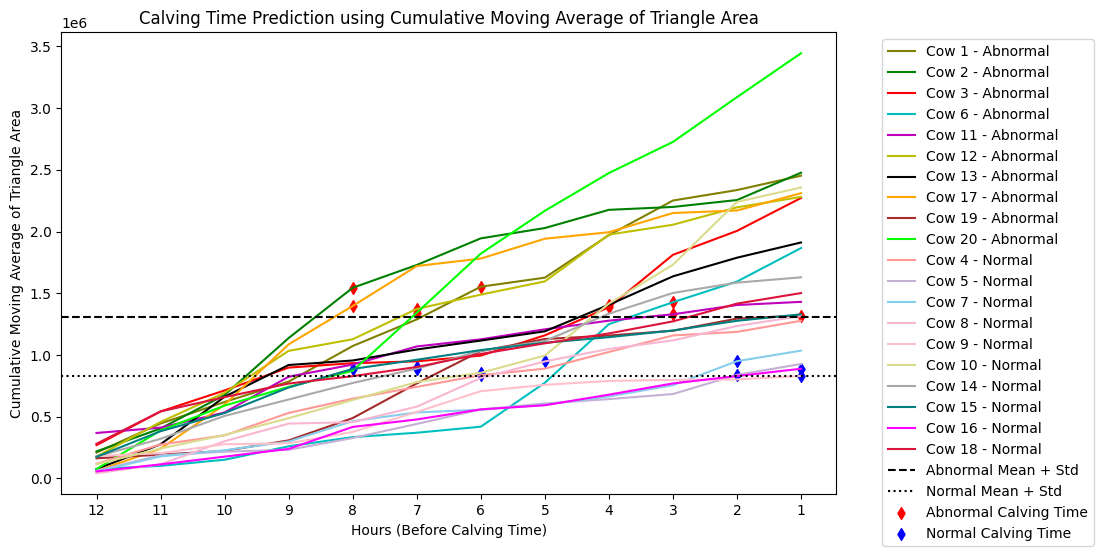

In [16]:
# List of paths for abnormal cows
abnormal_paths = [r'.\data\Cow 1',
                  r'.\data\Cow 2',
                  r'.\data\Cow 3',
                  r'.\data\Cow 6',
                  r'.\data\Cow 11',
                  r'.\data\Cow 12',
                  r'.\data\Cow 13',
                  r'.\data\Cow 17',
                  r'.\data\Cow 19',
                  r'.\data\Cow 20']

# List of paths for normal cows
normal_paths = [r'.\data\Cow 4',
                r'.\data\Cow 5',
                r'.\data\Cow 7',
                r'.\data\Cow 8',
                r'.\data\Cow 9',
                r'.\data\Cow 10',
                r'.\data\Cow 14',
                r'.\data\Cow 15',
                r'.\data\Cow 16',
                r'.\data\Cow 18']

# Lists to store cumulative moving average for abnormal and normal cows
abnormal_mv = []
normal_mv = []
all_abnormal_data = []
all_normal_data = []

# Define a list of colors for plotting each cow
colors = ['olive', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'brown', 'lime', '#ff9896', '#c5b0d5',
          'skyblue', '#f7b6d2', 'pink', '#dbdb8d', 'darkgray','teal', 'magenta','crimson']

# Loop for abnormal cows
for main_path in abnormal_paths:
    cumulative_mv_last_values = []
    csv_dataframe = find_csv_to_dataframe(main_path)
    csv_dataframe = csv_dataframe[::-1]

    ID = find_max_id(csv_dataframe)

    for idx, id_data in enumerate(csv_dataframe):
        x_values = id_data['new_gravity_x']
        y_values = id_data['new_gravity_y']
        moving_avg_euclidean_distance = cumulative_moving_average_triangle_area(x_values, y_values, window_size=3)

        if idx == 0:
            cumulative_mv_last_values.append(moving_avg_euclidean_distance[-1])
        else:
            cumulative_mv_last_values.append(cumulative_mv_last_values[-1] + moving_avg_euclidean_distance[-1])

    abnormal_mv.append(cumulative_mv_last_values)
    abnormal = main_path.split('\\')[-1]
    # print(f"Abnormal Moving Average of Triangle Area {abnormal} : {cumulative_mv_last_values}")

    # Creating formatted strings
    abnormal_output = []
    for idx in range(12, 0, -1):
        abnormal_string = f" {abnormal}, {idx}, {cumulative_mv_last_values[12 - idx]}"
        abnormal_output.append(abnormal_string)

    # Append to all_abnormal_data
    all_abnormal_data.extend(abnormal_output)

# Create a DataFrame from all abnormal data
df = pd.DataFrame([row.split(', ') for row in all_abnormal_data], columns=["Cattle IDs", "Before Calving Hours", "Cumulative Moving Average of Triangle Area"])

# Convert columns to numeric types
df["Before Calving Hours"] = pd.to_numeric(df["Before Calving Hours"].str.strip())
df["Cumulative Moving Average of Triangle Area"] = pd.to_numeric(df["Cumulative Moving Average of Triangle Area"].str.strip())


# Write DataFrame to Excel
excel_file = "abnormal_output2.xlsx"
df.to_excel(excel_file, index=False)

print(f"Data has been successfully written to {excel_file}")

# Loop for normal cows
for main_path in normal_paths:
    cumulative_mv_last_values = []
    csv_dataframe = find_csv_to_dataframe(main_path)
    csv_dataframe = csv_dataframe[::-1]

    ID = find_max_id(csv_dataframe)

    for idx, id_data in enumerate(csv_dataframe):
        x_values = id_data['new_gravity_x']
        y_values = id_data['new_gravity_y']
        moving_avg_euclidean_distance = cumulative_moving_average_triangle_area(x_values, y_values, window_size=3)

        if idx == 0:
            cumulative_mv_last_values.append(moving_avg_euclidean_distance[-1])
        else:
            cumulative_mv_last_values.append(cumulative_mv_last_values[-1] + moving_avg_euclidean_distance[-1])

    normal_mv.append(cumulative_mv_last_values)
    normal = main_path.split('\\')[-1]
    # print(f"Normal Moving Average of Triangle Area {normal} : {cumulative_mv_last_values}")

    # Creating formatted strings
    normal_output = []
    for idx in range(12, 0, -1):
        normal_string = f" {normal}, {idx}, {cumulative_mv_last_values[12 - idx]}"
        normal_output.append(normal_string)

    # Append to all_abnormal_data
    all_normal_data.extend(normal_output)

# Create a DataFrame from all abnormal data
df = pd.DataFrame([row.split(', ') for row in all_normal_data], columns=["Cattle IDs", "Before Calving Hours", "Cumulative Moving Average of Triangle Area"])

# Convert columns to numeric types
df["Before Calving Hours"] = pd.to_numeric(df["Before Calving Hours"].str.strip())
df["Cumulative Moving Average of Triangle Area"] = pd.to_numeric(df["Cumulative Moving Average of Triangle Area"].str.strip())

# Write DataFrame to Excel
excel_file = "normal_output2.xlsx"
df.to_excel(excel_file, index=False)

print(f"Data has been successfully written to {excel_file}")
    

# Calculate mean and standard deviation for abnormal cows
abnormal_mv_concat = np.concatenate(abnormal_mv)
mean_abnormal_mv = np.mean(abnormal_mv_concat)
std_abnormal_mv = np.std(abnormal_mv_concat)
mean_plus_std_abnormal_mv = mean_abnormal_mv + std_abnormal_mv
print("Abnormal Mean + Std Value : ",mean_plus_std_abnormal_mv)

# Calculate mean and standard deviation for normal cows
normal_mv_concat = np.concatenate(normal_mv)
mean_normal_mv = np.mean(normal_mv_concat)
std_normal_mv = np.std(normal_mv_concat)
mean_plus_std_normal_mv = mean_normal_mv + std_normal_mv
print("Normal Mean + Std Value : ",mean_plus_std_normal_mv)


# Plotting abnormal and normal cows together
plt.figure(figsize=(10, 6))
hours = list(range(-12, 0))

# Initialize variables to store x and y coordinates for red and blue diamonds
x_rd = []
y_rd = []
x_bd = []
y_bd = []

# Plot abnormal cows
for i, sublist in enumerate(abnormal_mv):
    folder = abnormal_paths[i].split('\\')[-1]
    plt.plot(hours, sublist, label=f'{folder} - Abnormal', color=colors[i % len(colors)])

    # Find the first index where abnormal condition is met
    idx_abnormal = next((idx for idx, value in enumerate(sublist) if value >= mean_plus_std_abnormal_mv), None)

    # Plot red diamond if abnormal condition is met
    if idx_abnormal is not None:
        x_rd.append(hours[idx_abnormal])
        y_rd.append(sublist[idx_abnormal])

# Plot normal cows
for i, sublist in enumerate(normal_mv):
    folder = normal_paths[i].split('\\')[-1]
    plt.plot(hours, sublist, label=f'{folder} - Normal', color=colors[(i + len(abnormal_paths)) % len(colors)])

    # Find the first index where normal condition is met
    idx_normal = next((idx for idx, value in enumerate(sublist) if value >= mean_plus_std_normal_mv), None)

    # Plot blue diamond if normal condition is met
    if idx_normal is not None:
        x_bd.append(hours[idx_normal])
        y_bd.append(sublist[idx_normal])

# Plot mean plus std lines for abnormal and normal cows
plt.axhline(mean_plus_std_abnormal_mv, color='black', linestyle='--', label='Abnormal Mean + Std')
plt.axhline(mean_plus_std_normal_mv, color='black', linestyle=':', label='Normal Mean + Std')

# Plot red diamond for abnormal calving time prediction
plt.scatter(x_rd, y_rd, color='red', label='Abnormal Calving Time', marker='d')
# Plot blue diamond for normal calving time prediction
plt.scatter(x_bd, y_bd, color='blue', label='Normal Calving Time', marker='d')

plt.xlabel('Hours (Before Calving Time)')
plt.ylabel('Cumulative Moving Average of Triangle Area')
plt.title('Calving Time Prediction using Cumulative Moving Average of Triangle Area')
# plt.xticks(range(-12, 0))
plt.xticks(range(-12, 0), [str(abs(i)) for i in range(12, 0, -1)])

# Place legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)

save_path = r'.\results'

# Save the plot to the folder
plot_filename = os.path.join(save_path, f'cattle_prediction_moving_average.png')
plt.savefig(plot_filename, bbox_inches='tight')  # bbox_inches='tight' ensures that the legend is included

# Show the plot
plt.show()